# Import Packages and Data

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
from tqdm import tqdm
import cv2
import shutil

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans

import tensorflow as tf

In [19]:
df = pd.read_csv('youtube_link_detail.csv')
df.head(10)

,Link,Views,Upload Date,Detail Views
0,https://www.youtube.com/watch?v=kqtD5dpn9C8,8.3M views,"Sep 16, 2020","8,340,944 views"
1,https://www.youtube.com/watch?v=rfscVS0vtbw,37M views,"Jul 12, 2018","37,537,262 views"
2,https://www.youtube.com/watch?v=_uQrJ0TkZlc,30M views,"Feb 18, 2019","30,500,494 views"
3,https://www.youtube.com/watch?v=iA8lLwmtKQM,1.1M views,"Apr 17, 2020","1,158,871 views"
4,https://www.youtube.com/watch?v=eWRfhZUzrAc,442K views,"Aug 9, 2022","442,323 views"
5,https://www.youtube.com/watch?v=b093aqAZiPU,1M views,"Mar 25, 2021","1,070,113 views"
6,https://www.youtube.com/watch?v=Z1Yd7upQsXY,8.2M views,"Dec 26, 2017","8,205,747 views"
7,https://www.youtube.com/watch?v=t8pPdKYpowI,3.3M views,"Mar 5, 2021","3,362,546 views"
8,https://www.youtube.com/watch?v=rWC2iFlN3TM,103K views,"Feb 3, 2021","103,306 views"
9,https://www.youtube.com/watch?v=XKHEtdqhLK8,6.6M views,"Feb 15, 2021","6,686,579 views"


In [20]:
df['Link'].duplicated().sum()

4

In [21]:
df_fix = df.drop_duplicates(subset=['Link'], keep='first')
df_fix['Link'].duplicated().sum()

0

In [22]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 650
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Link          647 non-null    object
 1   Views         647 non-null    object
 2   Upload Date   647 non-null    object
 3   Detail Views  647 non-null    object
dtypes: object(4)
memory usage: 25.3+ KB


# Preprocessing

## Detail Views as Integer

In [23]:
num_view = []
for i in df_fix.loc[:, ('Detail Views')]:
    num_view.append(i.split(' ')[0])

df_fix.loc[:, ('Detail Views')] = num_view   

c:\Users\farras\anaconda3\envs\ml\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [24]:
df_fix

,Link,Views,Upload Date,Detail Views
0,https://www.youtube.com/watch?v=kqtD5dpn9C8,8.3M views,"Sep 16, 2020","8,340,944"
1,https://www.youtube.com/watch?v=rfscVS0vtbw,37M views,"Jul 12, 2018","37,537,262"
2,https://www.youtube.com/watch?v=_uQrJ0TkZlc,30M views,"Feb 18, 2019","30,500,494"
3,https://www.youtube.com/watch?v=iA8lLwmtKQM,1.1M views,"Apr 17, 2020","1,158,871"
4,https://www.youtube.com/watch?v=eWRfhZUzrAc,442K views,"Aug 9, 2022","442,323"
...,...,...,...,...
646,https://www.youtube.com/watch?v=S9uPNppGsGo,6M views,"Apr 3, 2017","6,089,974"
647,https://www.youtube.com/watch?v=kWiCuklohdY,4.1M views,"Feb 20, 2020","4,128,274"
648,https://www.youtube.com/watch?v=JjAPRogWeOU,2.7K views,"Nov 23, 2022","2,723"
649,https://www.youtube.com/watch?v=5O9abIxIqNA,302K views,"Dec 24, 2021","302,183"


## Remove Comma

In [25]:
df_fix = df_fix.stack().str.replace(',','').unstack()
df_fix

,Link,Views,Upload Date,Detail Views
0,https://www.youtube.com/watch?v=kqtD5dpn9C8,8.3M views,Sep 16 2020,8340944
1,https://www.youtube.com/watch?v=rfscVS0vtbw,37M views,Jul 12 2018,37537262
2,https://www.youtube.com/watch?v=_uQrJ0TkZlc,30M views,Feb 18 2019,30500494
3,https://www.youtube.com/watch?v=iA8lLwmtKQM,1.1M views,Apr 17 2020,1158871
4,https://www.youtube.com/watch?v=eWRfhZUzrAc,442K views,Aug 9 2022,442323
...,...,...,...,...
646,https://www.youtube.com/watch?v=S9uPNppGsGo,6M views,Apr 3 2017,6089974
647,https://www.youtube.com/watch?v=kWiCuklohdY,4.1M views,Feb 20 2020,4128274
648,https://www.youtube.com/watch?v=JjAPRogWeOU,2.7K views,Nov 23 2022,2723
649,https://www.youtube.com/watch?v=5O9abIxIqNA,302K views,Dec 24 2021,302183


## Drop Videos with 0 Views

In [26]:
df_fix.drop(df_fix.index[df_fix['Detail Views'] == 'No'], inplace = True)

## Adjust Data Type 

In [27]:
df_fix['Detail Views'] = df_fix['Detail Views'].apply(int)
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646 entries, 0 to 650
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Link          646 non-null    object
 1   Views         646 non-null    object
 2   Upload Date   646 non-null    object
 3   Detail Views  646 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.2+ KB


## Remove Day and Month

In [28]:
tahun = []
for tanggal in df_fix['Upload Date']:
    tanggal_split = tanggal.split(' ')[-1]
    tahun.append(tanggal_split)

df_fix['Upload Date'] = tahun
df_fix.head()

,Link,Views,Upload Date,Detail Views
0,https://www.youtube.com/watch?v=kqtD5dpn9C8,8.3M views,2020,8340944
1,https://www.youtube.com/watch?v=rfscVS0vtbw,37M views,2018,37537262
2,https://www.youtube.com/watch?v=_uQrJ0TkZlc,30M views,2019,30500494
3,https://www.youtube.com/watch?v=iA8lLwmtKQM,1.1M views,2020,1158871
4,https://www.youtube.com/watch?v=eWRfhZUzrAc,442K views,2022,442323


## Adjust Data Type (2)

In [29]:
df_fix['Upload Date'] = df_fix['Upload Date'].apply(int)
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646 entries, 0 to 650
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Link          646 non-null    object
 1   Views         646 non-null    object
 2   Upload Date   646 non-null    int64 
 3   Detail Views  646 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 25.2+ KB


## Filter Years

In [30]:
df_fix.drop(df_fix.index[df_fix['Upload Date'] <= 2019], inplace = True)
df_fix['Upload Date'].value_counts()

2022    173
2020    119
2021    107
Name: Upload Date, dtype: int64

In [31]:
df_fix = df_fix.reset_index(drop=True)
df_fix.head()

,Link,Views,Upload Date,Detail Views
0,https://www.youtube.com/watch?v=kqtD5dpn9C8,8.3M views,2020,8340944
1,https://www.youtube.com/watch?v=iA8lLwmtKQM,1.1M views,2020,1158871
2,https://www.youtube.com/watch?v=eWRfhZUzrAc,442K views,2022,442323
3,https://www.youtube.com/watch?v=b093aqAZiPU,1M views,2021,1070113
4,https://www.youtube.com/watch?v=t8pPdKYpowI,3.3M views,2021,3362546


## Save to CSV

In [32]:
# df_fix.to_csv('data bersih_2019-2022.csv', index=False)

# EDA

In [33]:
df_fix['Detail Views'].describe().apply(lambda x: format(x, '2f'))

count         399.000000
mean       423448.483709
std       1267131.619993
min             1.000000
25%          4566.000000
50%         54554.000000
75%        279029.500000
max      18299120.000000
Name: Detail Views, dtype: object

In [34]:
df_sort_asc = df_fix.sort_values(by = 'Detail Views')[:150].reset_index(drop=True)
df_sort_asc

,Link,Views,Upload Date,Detail Views
0,https://www.youtube.com/watch?v=8nZhfFXdLfY,1 view,2022,1
1,https://www.youtube.com/watch?v=TvzmLd0FEIM,No views,2022,1
2,https://www.youtube.com/watch?v=898u3rCDX-k,No views,2022,1
3,https://www.youtube.com/watch?v=dufq5RBjtc4,No views,2022,1
4,https://www.youtube.com/watch?v=590rhWXL5d4,No views,2022,1
...,...,...,...,...
145,https://www.youtube.com/watch?v=ub7AzDdqEDc,18K views,2020,18278
146,https://www.youtube.com/watch?v=ZWI-jrnbMhA,18K views,2020,18375
147,https://www.youtube.com/watch?v=-FXLwjugI_Q,18K views,2020,18463
148,https://www.youtube.com/watch?v=7mTDcJ8bz_0,19K views,2020,19081


In [35]:
#100 - 24999
# len(df_fix.loc[(df_fix['Detail Views'] >= 100) & (df_fix['Detail Views'] < 25000), :].sort_values(by = 'Detail Views'))
df_fix.loc[(df_fix['Detail Views'] >= 100) & (df_fix['Detail Views'] < 25000), :].sort_values(by = 'Detail Views')

,Link,Views,Upload Date,Detail Views
318,https://www.youtube.com/watch?v=JjGJDUObcDo,101 views,2022,101
283,https://www.youtube.com/watch?v=nfHkVoEoc2s,111 views,2021,111
360,https://www.youtube.com/watch?v=YmWg9ygpjFc,115 views,2022,115
229,https://www.youtube.com/watch?v=nIuQu9LhNoA,117 views,2021,117
296,https://www.youtube.com/watch?v=cu0JGmTiCtY,126 views,2022,126
...,...,...,...,...
365,https://www.youtube.com/watch?v=vTtqtFtIzio,23K views,2022,23289
107,https://www.youtube.com/watch?v=ZLga4doUdjY,23K views,2021,23648
273,https://www.youtube.com/watch?v=G18YEjpwHDY,23K views,2022,23983
207,https://www.youtube.com/watch?v=DsCazsOPHSc,24K views,2021,24211


In [36]:
#25000 - 249999
len(df_fix.loc[(df_fix['Detail Views'] >= 25000) & (df_fix['Detail Views'] < 250000), :].sort_values(by = 'Detail Views'))

133

In [37]:
# >250000
len(df_fix.loc[(df_fix['Detail Views'] >= 250000), :].sort_values(by = 'Detail Views'))

102

In [38]:
class_names = ['Rendah', 'Sedang', 'Tinggi']
batas_bin = [100, 24999, 249999, 19000000]

In [39]:
df_fix.drop(df_fix.index[df_fix['Detail Views'] < 100], inplace = True)
len(df_fix)

334

# Binning

In [40]:
df_fix['Detail Views'] = pd.cut(df_fix['Detail Views'], batas_bin, labels=class_names)
df_fix['Detail Views'].value_counts()

Sedang    133
Tinggi    102
Rendah     99
Name: Detail Views, dtype: int64

# Get Youtube Video Identfier

In [41]:
df_yt_code = df_fix.loc[:, ('Link', 'Detail Views')]
yt_code = []
for i in df_yt_code['Link']:
    yt_code.append(i.split('=')[1])

df_yt_code['Link'] = yt_code
df_yt_code.head()

,Link,Detail Views
0,kqtD5dpn9C8,Tinggi
1,iA8lLwmtKQM,Tinggi
2,eWRfhZUzrAc,Tinggi
3,b093aqAZiPU,Tinggi
4,t8pPdKYpowI,Tinggi


In [26]:
data_train = df_yt_code.sample(frac = 0.80, random_state=10)
data_val = df_yt_code.drop(data_train.index)

print(len(data_train) + len(data_val))

334


# Labelling Data

In [27]:
# path_tinggi_train = 'train/Tinggi/'
# path_sedang_train = 'train/Sedang/'
# path_rendah_train = 'train/Rendah/'

# for index, row in data_train.iterrows():
#     if row['Detail Views'] == 'Tinggi':
#         shutil.move('youtube_thumbnail/'+ row['Link'] + '.jpg', path_tinggi_train)
#     elif row['Detail Views'] == 'Sedang':
#         shutil.move('youtube_thumbnail/'+ row['Link'] + '.jpg', path_sedang_train)
#     elif row['Detail Views'] == 'Rendah':
#         shutil.move('youtube_thumbnail/'+ row['Link'] + '.jpg', path_rendah_train)
    

In [28]:
# path_tinggi_val = 'val/Tinggi/'
# path_sedang_val = 'val/Sedang/'
# path_rendah_val = 'val/Rendah/'

# for index, row in data_val.iterrows():
#     if row['Detail Views'] == 'Tinggi':
#         shutil.move('youtube_thumbnail/'+ row['Link'] + '.jpg', path_tinggi_val)
#     elif row['Detail Views'] == 'Sedang':
#         shutil.move('youtube_thumbnail/'+ row['Link'] + '.jpg', path_sedang_val)
#     elif row['Detail Views'] == 'Rendah':
#         shutil.move('youtube_thumbnail/'+ row['Link'] + '.jpg', path_rendah_val)
    

In [45]:
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
print(class_names_label)
nb_classes = len(class_names)

IMAGE_SIZE = (640, 360)


{'Rendah': 0, 'Sedang': 1, 'Tinggi': 2}


# Load Data

In [46]:
def load_data():
    
    datasets = ['train', 'val']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'uint8')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [47]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading train


100%|██████████| 83/83 [00:01<00:00, 58.78it/s]


Loading val


100%|██████████| 19/19 [00:00<00:00, 58.45it/s]


In [32]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(train_images.shape))

Number of training examples: 267
Number of testing examples: 67
Each image is of size: (267, 360, 640, 3)


In [33]:
train_images

array([[[[ 82, 113, 255],
         [ 82, 113, 255],
         [ 82, 113, 255],
         ...,
         [ 82, 113, 255],
         [ 82, 113, 255],
         [ 82, 113, 255]],

        [[ 82, 113, 255],
         [ 82, 113, 255],
         [ 82, 113, 255],
         ...,
         [ 82, 113, 255],
         [ 82, 113, 255],
         [ 82, 113, 255]],

        [[ 82, 113, 255],
         [ 82, 113, 255],
         [ 82, 113, 255],
         ...,
         [ 82, 113, 255],
         [ 82, 113, 255],
         [ 82, 113, 255]],

        ...,

        [[ 27,  17,  16],
         [ 27,  17,  16],
         [ 28,  18,  17],
         ...,
         [ 82, 113, 255],
         [ 82, 113, 255],
         [ 82, 113, 255]],

        [[ 27,  17,  16],
         [ 27,  17,  16],
         [ 28,  18,  17],
         ...,
         [ 82, 113, 255],
         [ 82, 113, 255],
         [ 82, 113, 255]],

        [[ 27,  17,  16],
         [ 27,  17,  16],
         [ 28,  18,  17],
         ...,
         [ 82, 113, 255],
        

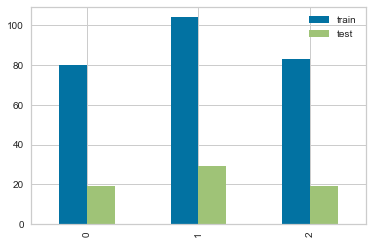

In [34]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                'test': test_counts} 
                ).plot.bar()
plt.show()

In [35]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

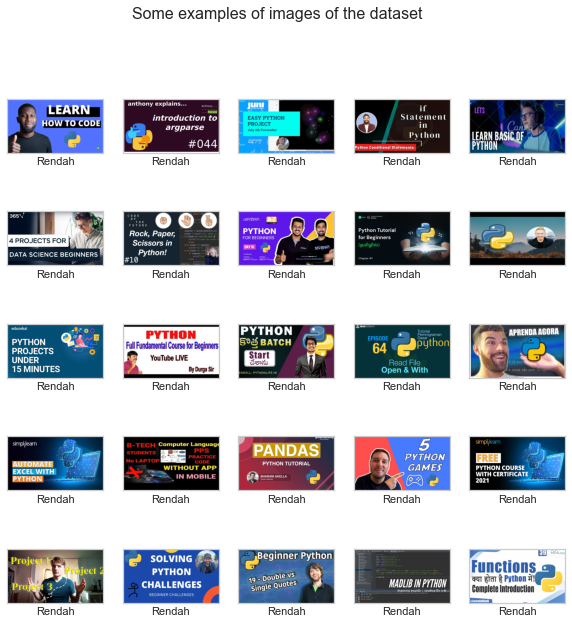

In [36]:
display_examples(class_names, train_images, train_labels)

In [37]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [38]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, IMAGE_SIZE) 
        if img is not None:
            images.append(img)
    return np.array(images, dtype='uint8')

In [39]:
all_images = np.concatenate((train_images, test_images), axis=0)

rendah_images = np.concatenate((load_images_from_folder('train/Rendah/'), 
                                load_images_from_folder('val/Rendah/')), axis=0)

sedang_images = np.concatenate((load_images_from_folder('train/Sedang/'), 
                                load_images_from_folder('val/Sedang/')), axis=0)

tinggi_images = np.concatenate((load_images_from_folder('train/Tinggi/'), 
                                load_images_from_folder('val/Tinggi/')), axis=0)


In [40]:
all_images_reshape = all_images.reshape(-1, all_images.shape[1]*all_images.shape[2]*all_images.shape[3])
rendah_reshape = rendah_images.reshape(-1, rendah_images.shape[1]*rendah_images.shape[2]*rendah_images.shape[3])
sedang_reshape = sedang_images.reshape(-1, sedang_images.shape[1]*sedang_images.shape[2]*sedang_images.shape[3])
tinggi_reshape = tinggi_images.reshape(-1, tinggi_images.shape[1]*tinggi_images.shape[2]*tinggi_images.shape[3])

# Dominant Colors

## All Images

In [41]:
number_of_colors = 5
clf = KMeans(n_clusters = number_of_colors, random_state = 10)
labels = clf.fit_predict(all_images_reshape)
# labels_rendah = clf.fit_predict(rendah_reshape)
# labels_sedang = clf.fit_predict(sedang_reshape)
# labels_tinggi = clf.fit_predict(tinggi_reshape)

['#9bb7cb', '#1b2533', '#325ea1', '#9f8364', '#40484e']


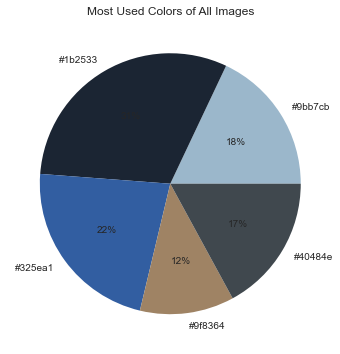

In [42]:
from collections import Counter

counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
print(hex_colors)
rgb_colors = [ordered_colors[i] for i in counts.keys()]

plt.figure(figsize = (8, 6))
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors, autopct='%.0f%%')
plt.title('Most Used Colors of All Images')
plt.show()



## Sedang

In [43]:
clf1 = KMeans(n_clusters = number_of_colors, random_state = 10)
labels_sedang = clf1.fit_predict(sedang_reshape)

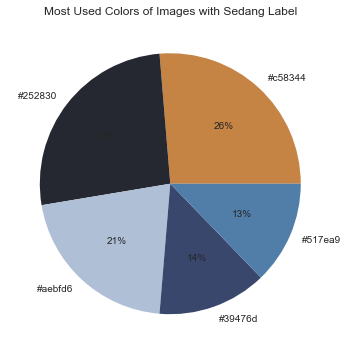

In [44]:
counts_sedang = Counter(labels_sedang)

center_colors1 = clf1.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors1[i] for i in counts_sedang.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts_sedang.keys()]
rgb_colors = [ordered_colors[i] for i in counts_sedang.keys()]

plt.figure(figsize = (8, 6))
plt.pie(counts_sedang.values(), labels = hex_colors, colors = hex_colors, autopct='%.0f%%')
plt.title('Most Used Colors of Images with Sedang Label')
plt.show()

## Rendah

In [45]:
clf2 = KMeans(n_clusters = number_of_colors, random_state = 10)
labels_rendah = clf2.fit_predict(rendah_reshape)

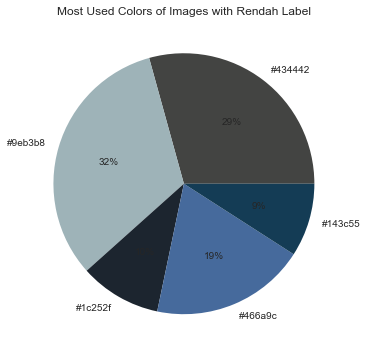

In [46]:
counts_rendah = Counter(labels_rendah)

center_colors2 = clf2.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors2[i] for i in counts_rendah.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts_rendah.keys()]
rgb_colors = [ordered_colors[i] for i in counts_rendah.keys()]

plt.figure(figsize = (8, 6))
plt.pie(counts_rendah.values(), labels = hex_colors, colors = hex_colors, autopct='%.0f%%')
plt.title('Most Used Colors of Images with Rendah Label')
plt.show()

## Tinggi

In [47]:
clf3 = KMeans(n_clusters = number_of_colors, random_state = 10)
labels_tinggi = clf3.fit_predict(tinggi_reshape)

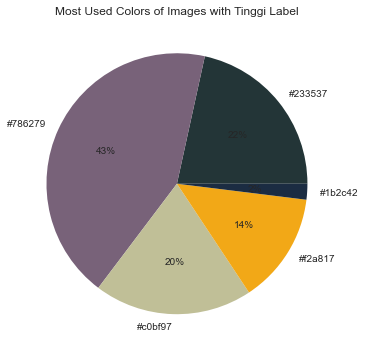

In [48]:
counts_tinggi = Counter(labels_tinggi)

center_colors3 = clf3.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors3[i] for i in counts_tinggi.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts_tinggi.keys()]
rgb_colors = [ordered_colors[i] for i in counts_tinggi.keys()]

plt.figure(figsize = (8, 6))
plt.pie(counts_tinggi.values(), labels = hex_colors, colors = hex_colors, autopct='%.0f%%')
plt.title('Most Used Colors of Images with Tinggi Label')
plt.show()

# Normalization

In [48]:
train_images = train_images/255
test_images = test_images/255

# Clustering

## PCA

In [148]:
X = train_images.reshape(-1, train_images.shape[1]*train_images.shape[2]*train_images.shape[3])
print('ukuran data train (fitur):', X.shape)

X_scaling = StandardScaler().fit_transform(X)
    

ukuran data train (fitur): (267, 691200)


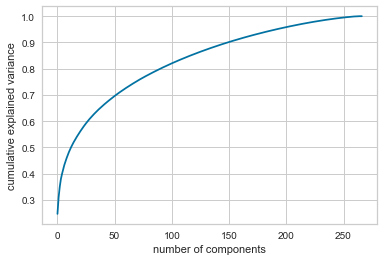

In [121]:
pca = PCA().fit(X_scaling)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

dimensi data setelah PCA: (267, 200)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


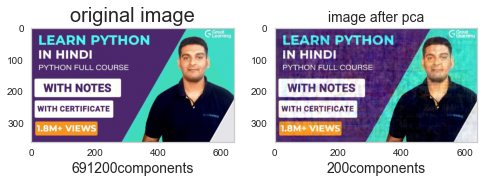

In [124]:
pca = PCA(n_components=200, random_state=10)
X_pca = pca.fit_transform(X)
print('dimensi data setelah PCA:', X_pca.shape)

approximation = pca.inverse_transform(X_pca)
plt.figure(figsize=(8,4))
n = 200
plt.subplot(1, 2, 1)
plt.imshow(X[n].reshape(train_images.shape[1], train_images.shape[2], train_images.shape[3]), cmap=plt.get_cmap('gray'))
plt.xlabel(str(X.shape[1])+'components', fontsize = 14)
plt.title('original image', fontsize = 20)
plt.grid(False)
plt.subplot(1, 2, 2)
plt.imshow(approximation[n].reshape(train_images.shape[1], train_images.shape[2], train_images.shape[3]), cmap=plt.get_cmap('gray'))
plt.xlabel(str(X_pca.shape[1])+'components', fontsize = 14)
plt.title('image after pca', fontsize = 14)
plt.grid(False)
plt.show()

## Determine Number of CLusters

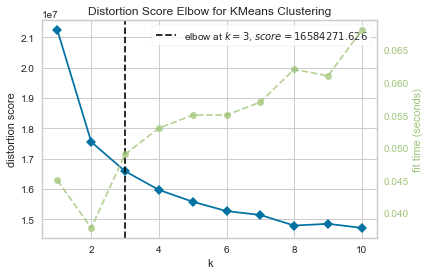

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [125]:
visualizer = KElbowVisualizer(KMeans(random_state=10, max_iter = 1000), k=(1,11))

visualizer.fit(X_pca)
visualizer.show()

## Kmeans

In [126]:
kmeans = KMeans(n_clusters=3, n_jobs=-1, random_state=21, max_iter = 1000)
kmeans.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [49]:
y_kmeans = kmeans.fit_predict(X_pca)

## Kmeans Visualisation

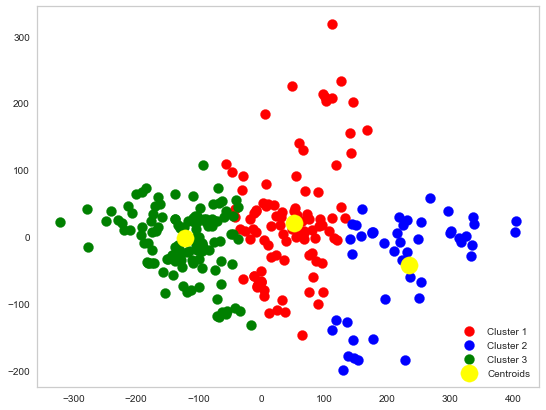

In [127]:
plt.figure(figsize=(9, 7))
plt.scatter(X_pca[y_kmeans==0, 0], X_pca[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_pca[y_kmeans==1, 0], X_pca[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X_pca[y_kmeans==2, 0], X_pca[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
# plt.scatter(X_pca[y_kmeans==3, 0], X_pca[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.legend(loc = 4)
plt.grid(None)
plt.show()

## Clustering Analysis

In [245]:
# Jumlah data pada setiap cluster
clustering_label = pd.DataFrame(y_kmeans)
clustering_label.value_counts()

2    121
0     99
1     47
dtype: int64

CLUSTER 0
99 elements


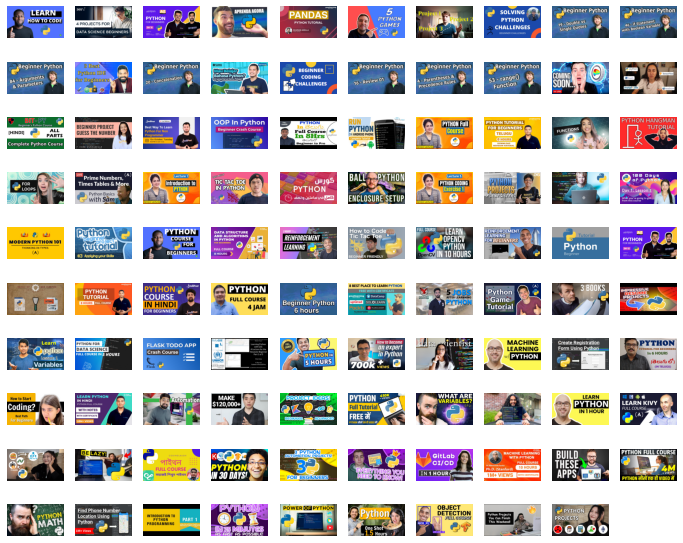

Frequency of Each Category:
1    42
2    34
0    23
dtype: int64

CLUSTER 1
47 elements


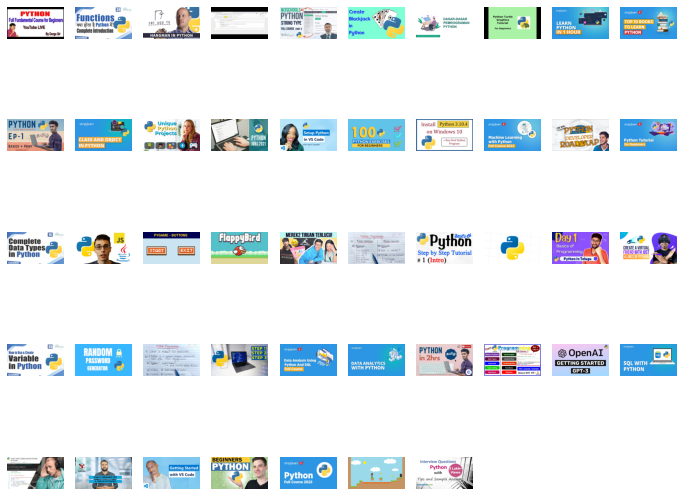

Frequency of Each Category:
1    29
0    13
2     5
dtype: int64

CLUSTER 2
121 elements


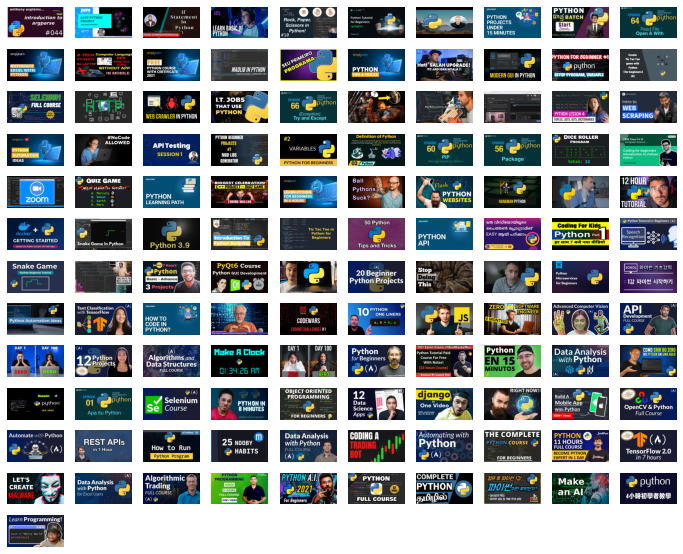

Frequency of Each Category:
0    44
2    44
1    33
dtype: int64



In [45]:
# Melihat data hasil cluster
Z = kmeans.predict(X_pca)

for i in range(0,3):
    image_label = []
    row = np.where(Z==i)[0]
    num = row.shape[0]          
    r = int(np.floor(num/10.))    
    
    print("CLUSTER "+str(i))
    print(str(num)+" elements")

    plt.figure(figsize=(12,10))
    for k in range(0, num):
        plt.subplot(r+1, 10, k+1)
        image = train_images[row[k], ]
        image = image.reshape(360, 640, 3)
        image_label.append(train_labels[row[k], ])
        plt.imshow(image, cmap=plt.cm.binary)
        plt.axis('off')
    plt.show()
    print('Frequency of Each Category:')
    print(pd.Series(image_label).value_counts())
    print()

# Classification - Classic CNN

In [80]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (360, 640, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [81]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [82]:
history = model.fit(train_images, train_labels, batch_size=16, epochs=20, validation_split = 0.2)

Train on 213 samples, validate on 54 samples
Epoch 1/20
213/213 [==============================] - 18s 84ms/sample - loss: 754.3254 - acc: 0.3662 - val_loss: 1.7966 - val_acc: 0.6111
Epoch 2/20
213/213 [==============================] - 17s 79ms/sample - loss: 7.1416 - acc: 0.3991 - val_loss: 1.8359 - val_acc: 0.1852
Epoch 3/20
213/213 [==============================] - 17s 79ms/sample - loss: 0.7707 - acc: 0.7606 - val_loss: 3.7725 - val_acc: 0.0741
Epoch 4/20
213/213 [==============================] - 18s 83ms/sample - loss: 0.4465 - acc: 0.9249 - val_loss: 4.4760 - val_acc: 0.0741
Epoch 5/20
213/213 [==============================] - 17s 78ms/sample - loss: 0.4677 - acc: 0.9531 - val_loss: 2.5953 - val_acc: 0.0926
Epoch 6/20
213/213 [==============================] - 17s 78ms/sample - loss: 0.3897 - acc: 0.9531 - val_loss: 3.7612 - val_acc: 0.0556
Epoch 7/20
213/213 [==============================] - 17s 80ms/sample - loss: 0.2566 - acc: 0.9390 - val_loss: 5.7371 - val_acc: 0.0741
E

In [66]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

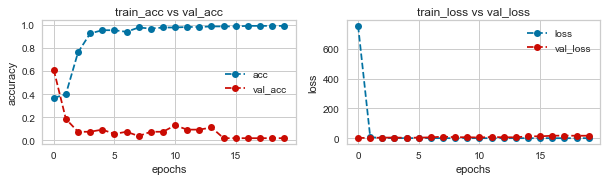

In [83]:
plot_accuracy_loss(history)

In [84]:
test_loss = model.evaluate(test_images, test_labels)

67/67 [==============================] - 1s 12ms/sample - loss: 8.7129 - acc: 0.3284


# Classification - ResNet50

In [47]:
from tensorflow.keras.models import Model,load_model, Sequential
from tensorflow.keras.layers import  GlobalAveragePooling2D, Dropout, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import  Adam

from tensorflow.keras.applications.resnet50 import ResNet50

c:\Users\farras\anaconda3\envs\ml\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 30s 0us/step
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [52]:
base_model = ResNet50(weights= 'imagenet', include_top=False, input_shape= (360, 640, 3))
resnet = base_model.output
resnet = GlobalAveragePooling2D()(resnet)
resnet = Dropout(0.25)(resnet)
predictions = Dense(3, activation= 'softmax')(resnet)
Resnet50 = Model(inputs = base_model.input, outputs = predictions)

In [60]:
adam = Adam(learning_rate = 0.001)
Resnet50.compile(optimizer= adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [69]:
History = Resnet50.fit(train_images,
                        train_labels, 
                        batch_size = 4,
                        epochs = 2
                        )

Epoch 1/2
267/267 [==============================] - 446s 2s/sample - loss: 1.3098 - acc: 0.3858
Epoch 2/2
267/267 [==============================] - 433s 2s/sample - loss: 1.1252 - acc: 0.3670


In [71]:
test_loss2 = Resnet50.evaluate(test_images, test_labels)

67/67 [==============================] - 11s 166ms/sample - loss: 1464.2639 - acc: 0.2836


# Classification - Classic CNN

In [169]:
import keras
import time
from tensorflow import keras
from keras import Sequential
from keras import layers
import tensorflow as tf
# import tensorflow_addons as tfa
# from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout,SeparableConv2D, Activation, BatchNormalization, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG


In [173]:
def create_model():
    shape_img = (360,640,3)
    
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(3))
    model.add(Activation('softmax'))

    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

In [174]:
model = create_model()
hists = []

# divisor = 5

start_time = time.time()
# X_train, y_train = load_img(cut_df(df,divisor,1))
# y_train = to_categorical(y_train)

callbacks = [EarlyStopping(monitor='val_loss', patience=20),
            ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

model.fit(train_images, train_labels, batch_size=128, epochs=10, callbacks=callbacks, validation_split = 0.1, verbose = 1)
hists.append(model.history.history)


Train on 240 samples, validate on 27 samples
Epoch 1/10
240/240 [==============================] - 93s 389ms/sample - loss: 55.5815 - acc: 0.3792 - val_loss: 68.6767 - val_acc: 0.0000e+00
Epoch 2/10
240/240 [==============================] - 46s 191ms/sample - loss: 18.9461 - acc: 0.4333 - val_loss: 3.3217 - val_acc: 0.0000e+00
Epoch 3/10
240/240 [==============================] - 34s 143ms/sample - loss: 5.9629 - acc: 0.3208 - val_loss: 0.3380 - val_acc: 0.9630
Epoch 4/10
240/240 [==============================] - 42s 174ms/sample - loss: 1.8790 - acc: 0.3708 - val_loss: 2.9184 - val_acc: 0.0000e+00
Epoch 5/10
240/240 [==============================] - 48s 199ms/sample - loss: 1.4842 - acc: 0.4042 - val_loss: 1.6203 - val_acc: 0.0000e+00
Epoch 6/10
240/240 [==============================] - 50s 208ms/sample - loss: 1.1264 - acc: 0.3917 - val_loss: 1.1140 - val_acc: 0.1481
Epoch 7/10
240/240 [==============================] - 47s 194ms/sample - loss: 1.0355 - acc: 0.4625 - val_loss: 1.

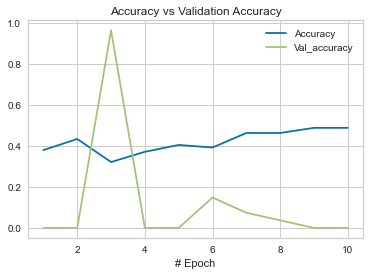

In [177]:
acc = []
val_acc = []
for i in range(len(hists)):
    acc += hists[i]["acc"]
    val_acc += hists[i]["val_acc"]
hist_df = pd.DataFrame({"# Epoch": [e for e in range(1,len(acc)+1)],"Accuracy": acc, "Val_accuracy": val_acc})
hist_df.plot(x = "# Epoch", y = ["Accuracy","Val_accuracy"])
plt.title("Accuracy vs Validation Accuracy")
plt.show()

# SVM

In [49]:
X = train_images.reshape(-1, train_images.shape[1]*train_images.shape[2]*train_images.shape[3])
print('ukuran data train (fitur):', X.shape)

X_test = test_images.reshape(-1, test_images.shape[1]*test_images.shape[2]*test_images.shape[3])
print('ukuran data train (fitur):', X_test.shape)

ukuran data train (fitur): (267, 691200)
ukuran data train (fitur): (67, 691200)


In [50]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X, train_labels)

SVC(gamma='auto', kernel='linear')

In [51]:
from sklearn.metrics import accuracy_score

y2 = svc.predict(X_test)
print("Accuracy on unknown data is",accuracy_score(test_labels, y2))

Accuracy on unknown data is 0.3283582089552239


# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 10)
rf.fit(X, train_labels)

y_pred=rf.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, test_labels)

0.5074626865671642